# Group 12_Discretization_Cluster Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Import and Analyze Data

Menggunakan dataset iris dari module `sklearn`

In [2]:
# Load iris dataset
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check null values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# Correlation
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

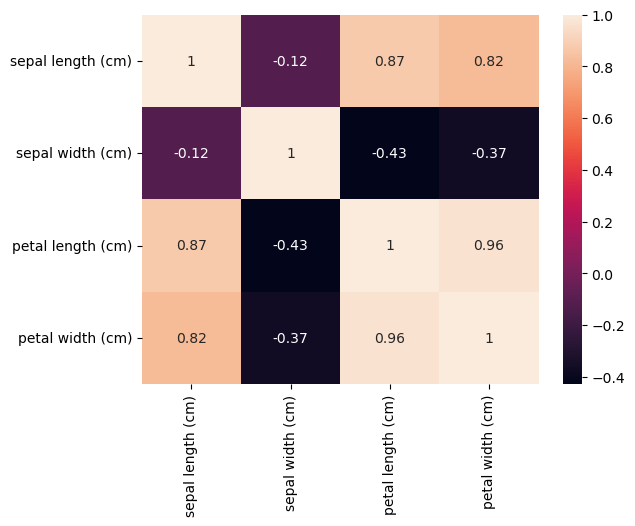

In [7]:
# Correlation heatmap
sns.heatmap(iris.corr(), annot=True)

## K-Means

### Discretization Data

Menggunakan algoritma `KBinsDiscretizer` yang terdapat pada module `sklearn`

In [8]:
# Discretization sepal length
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
iris_discretized = discretizer.fit_transform(iris)

C:\Users\Indra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Indra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Indra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Indra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

### KBinsDiscretizer Algorithm Bin Edges

In [9]:
# Bin edges for every feature
bin_edges_discretized = pd.DataFrame([bins for bins in discretizer.bin_edges_], columns=["d_bin 1", "d_bin 2", "d_bin 3", "d_bin 4"], index=data.feature_names)
bin_edges_discretized

,d_bin 1,d_bin 2,d_bin 3,d_bin 4
sepal length (cm),4.3,5.533093,6.548770,7.9
sepal width (cm),2.0,2.852169,3.435615,4.4
petal length (cm),1.0,2.876370,4.959501,6.9
petal width (cm),0.1,0.791519,1.705475,2.5


### Plot the Discretized Data

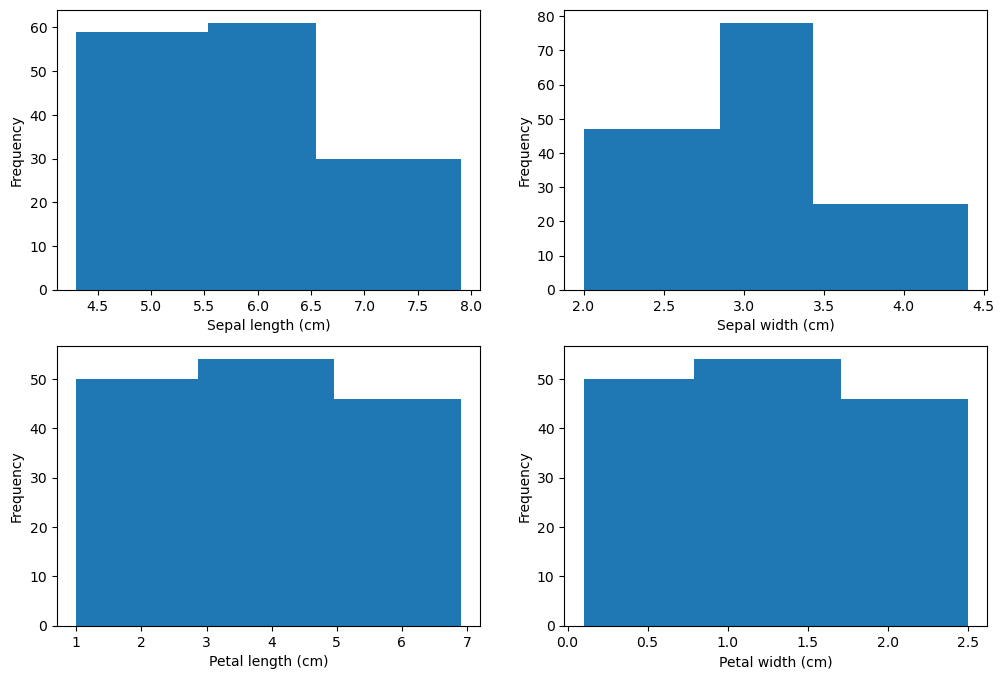

In [10]:
# Making figure
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Sepal length
ax[0, 0].hist(iris.iloc[:,0], bins = [bin for bin in discretizer.bin_edges_[0]])
ax[0, 0].set_xlabel('Sepal length (cm)')
ax[0, 0].set_ylabel('Frequency')

# Sepal width
ax[0, 1].hist(iris.iloc[:,1], bins = [bin for bin in discretizer.bin_edges_[1]])
ax[0, 1].set_xlabel('Sepal width (cm)')
ax[0, 1].set_ylabel('Frequency')

# Petal length
ax[1, 0].hist(iris.iloc[:,2], bins = [bin for bin in discretizer.bin_edges_[2]])
ax[1, 0].set_xlabel('Petal length (cm)')
ax[1, 0].set_ylabel('Frequency')

# Petal width
ax[1, 1].hist(iris.iloc[:,3], bins = [bin for bin in discretizer.bin_edges_[3]])
ax[1, 1].set_xlabel('Petal width (cm)')
ax[1, 1].set_ylabel('Frequency');

### KMeans Algorithm

Menggunakan algoritma `KMeans` yang terdapat pada module `sklearn`

$$ \sum_{i=0}^{n} \min_{\mu_{j} \in C}(||x_{i} - \mu_{j}||)^{2} $$

In [11]:
# Fitting KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42).fit(iris)

# KMeans cluster centers
print("Clusters: ")
print(kmeans.cluster_centers_)

# KMeans cluster labels
iris_labels = iris.copy()
iris_labels["labels"] = kmeans.labels_
iris_labels.head()

Clusters: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Visualization

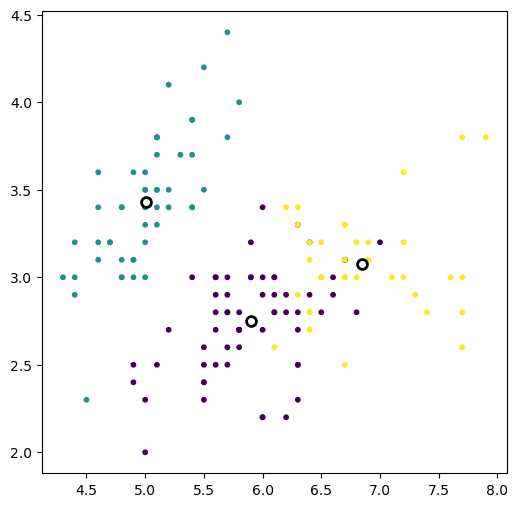

In [12]:
# sns.scatterplot(data=iris, x="sepal length (cm)", y="sepal width (cm)", hue="labels")
plt.figure(figsize=(6,6))
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c = kmeans.fit_predict(iris), s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="w", edgecolors="k", s=50, linewidths=2)
plt.show()

### KMeans Algorithm Bin Edges

In [13]:
# Function for getting bin edges usign k-means algorithm
def get_bin_edges(data, cluster, random_state):
    kmeans = KMeans(n_clusters=cluster, random_state=random_state).fit(data.reshape(-1,1))
    cluster_centers = kmeans.cluster_centers_.ravel()
    bin_edges = np.sort(np.array([data[kmeans.labels_ == i].max() for i in range(3)]))
    bin_edges = np.insert(bin_edges, 0, data.min())
    bin_edges = np.append(bin_edges, data.max())
    return(bin_edges[0:len(bin_edges)-1])

# Calculate bin edges for every feature using KMeans
bin_edge = [get_bin_edges(data.data[:,i], 3, 42) for i in range(0,4)]

# Create pandas dataframe for bin edge using KMeans algorithm
bin_edge_kmeans = pd.DataFrame([bins for bins in bin_edge], columns=["km_bin 1", "km_bin 2", "km_bin 3", "km_bin 4"], index=data.feature_names)
bin_edge_kmeans

,km_bin 1,km_bin 2,km_bin 3,km_bin 4
sepal length (cm),4.3,5.5,6.5,7.9
sepal width (cm),2.0,2.7,3.3,4.4
petal length (cm),1.0,1.9,4.8,6.9
petal width (cm),0.1,0.6,1.6,2.5


### Compare KBinsDiscretizer Algorithm Bin Edges and KMeans Algorithm Bin Edges

In [14]:
bin_edges_discretized.join(bin_edge_kmeans)

,d_bin 1,d_bin 2,d_bin 3,d_bin 4,km_bin 1,km_bin 2,km_bin 3,km_bin 4
sepal length (cm),4.3,5.533093,6.548770,7.9,4.3,5.5,6.5,7.9
sepal width (cm),2.0,2.852169,3.435615,4.4,2.0,2.7,3.3,4.4
petal length (cm),1.0,2.876370,4.959501,6.9,1.0,1.9,4.8,6.9
petal width (cm),0.1,0.791519,1.705475,2.5,0.1,0.6,1.6,2.5


### Evaluation (Inertia)

C:\Users\Indra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


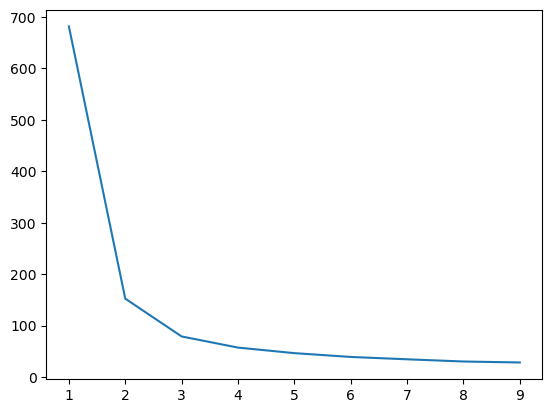

In [15]:
# List for inertia score
kmeans_inertia = []

# Calculate inertia for every number of clusters
for n in range(1,10):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(iris.iloc[:, 0:4])
    kmeans_inertia.append(kmeans.inertia_)

# Plot inertia graph
plt.plot(range(1, 10), kmeans_inertia)

## Agglomerative Hierarchical Clustering

In [16]:
# Fitting Agglomerative Hierarchical Clustering algorithm
ahc = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = ahc.fit_predict(iris)

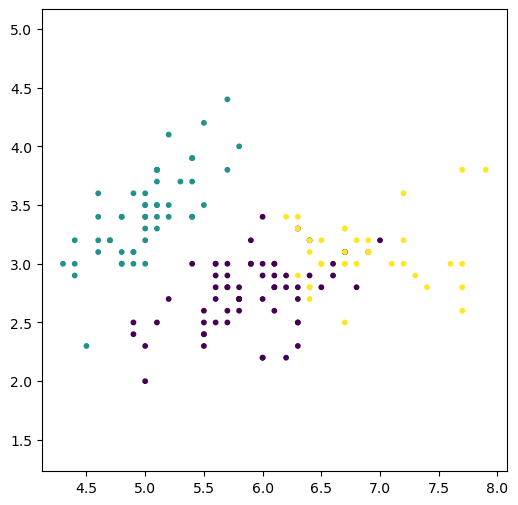

In [17]:
# Visualization
plt.figure(figsize=(6,6))
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=labels, s=10)
plt.axis("equal")
plt.show()

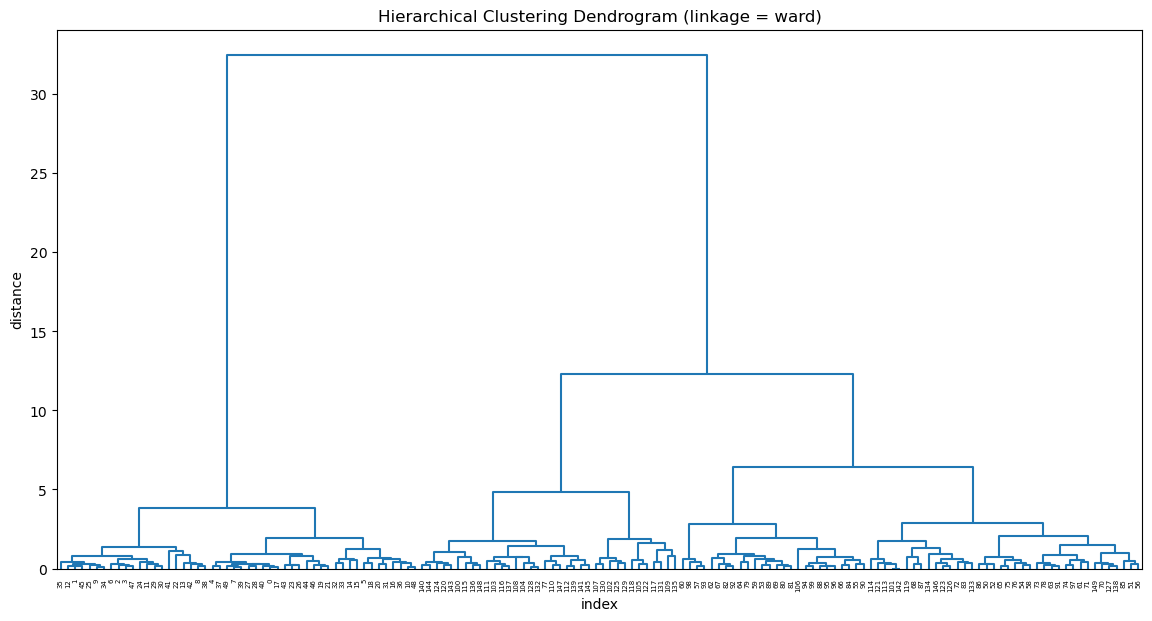

In [18]:
# Dendrogram
linkage_matrix = linkage(iris, 'ward')
plot = plt.figure(figsize=(14, 7))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (linkage = ward)')
plt.xlabel('index')
plt.ylabel('distance')
plt.show()

## DBSCAN

In [19]:
# Fitting DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(iris)

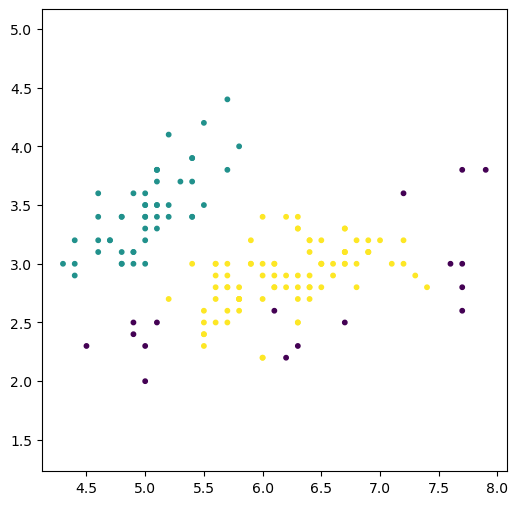

In [20]:
# Visualization
plt.figure(figsize=(6,6))
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=labels, s=10)
plt.axis("equal")
plt.show()

## Application

### Image Quantification

In [21]:
# Import image
img = plt.imread("assets/car2.jpg")
img.shape

(363, 640, 3)

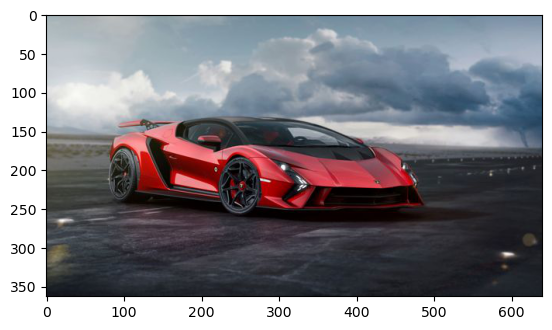

In [22]:
plt.imshow(img)

In [23]:
# Reshpae image
img = img.reshape(-1, 3)
img

array([[165, 180, 187],
       [165, 180, 187],
       [165, 180, 187],
       ...,
       [ 29,  34,  40],
       [ 29,  34,  40],
       [ 29,  34,  40]], dtype=uint8)

In [24]:
len(img) # Total pixel

232320

In [25]:
len(np.unique(img, axis=0)) # Total unique color

41112

In [26]:
# Fitting KMeans algorithm
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(img)

In [27]:
# KMeans labels
labels

array([5, 5, 5, ..., 1, 1, 1])

In [28]:
# Get colour from KMeans cluster centers
palette = kmeans.cluster_centers_.astype(int)
palette

array([[126, 144, 160],
       [ 29,  27,  31],
       [213, 214, 215],
       [ 56,  55,  61],
       [141,  16,  19],
       [166, 177, 185],
       [ 89,  98, 109],
       [210,  94, 104]])

In [29]:
# Reshape quantized image
quantized_img = palette[labels].reshape(363, 640, 3)
quantized_img

array([[[166, 177, 185],
        [166, 177, 185],
        [166, 177, 185],
        ...,
        [126, 144, 160],
        [126, 144, 160],
        [126, 144, 160]],

       [[166, 177, 185],
        [166, 177, 185],
        [166, 177, 185],
        ...,
        [126, 144, 160],
        [126, 144, 160],
        [126, 144, 160]],

       [[166, 177, 185],
        [166, 177, 185],
        [166, 177, 185],
        ...,
        [126, 144, 160],
        [126, 144, 160],
        [126, 144, 160]],

       ...,

       [[ 29,  27,  31],
        [ 29,  27,  31],
        [ 29,  27,  31],
        ...,
        [ 29,  27,  31],
        [ 29,  27,  31],
        [ 29,  27,  31]],

       [[ 29,  27,  31],
        [ 29,  27,  31],
        [ 29,  27,  31],
        ...,
        [ 29,  27,  31],
        [ 29,  27,  31],
        [ 29,  27,  31]],

       [[ 29,  27,  31],
        [ 29,  27,  31],
        [ 29,  27,  31],
        ...,
        [ 29,  27,  31],
        [ 29,  27,  31],
        [ 29,  27,  31]]

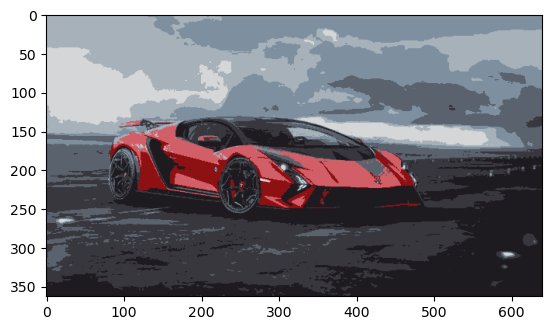

In [30]:
# Result
plt.imshow(quantized_img)

In [31]:
# Function to get quantized image
def quantize(img, n_palette):
    n_unique = len(np.unique(img.reshape(-1, 3), axis=0))
    
    kmeans = KMeans(n_clusters=n_palette, random_state=42)
    labels = kmeans.fit_predict(img.reshape(-1, 3))
    pallete = kmeans.cluster_centers_.astype(int)
    quantized_img = pallete[labels].reshape(*img.shape)
    
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"Original Image [{n_unique} colors]")
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(quantized_img)
    plt.title(f"Quantized Image [{n_palette} colors]")
    plt.xticks([]); plt.yticks([])

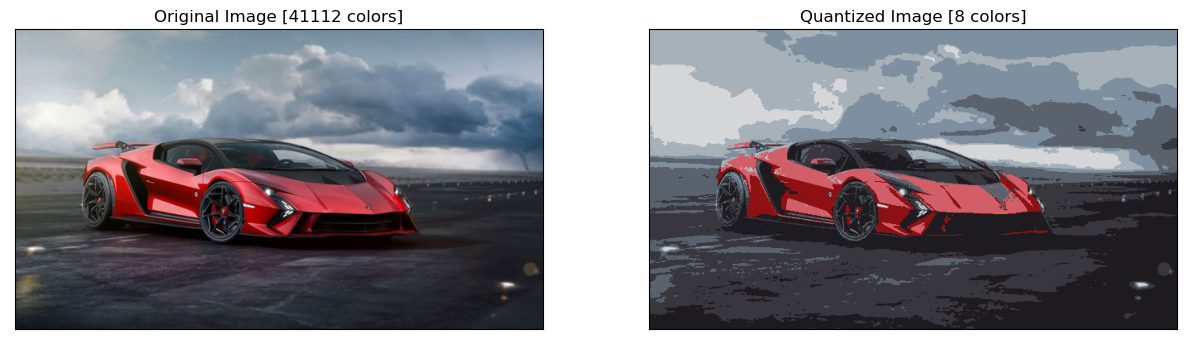

In [32]:
# 8 clusters
img = plt.imread("assets/car2.jpg")
quantize(img, 8)

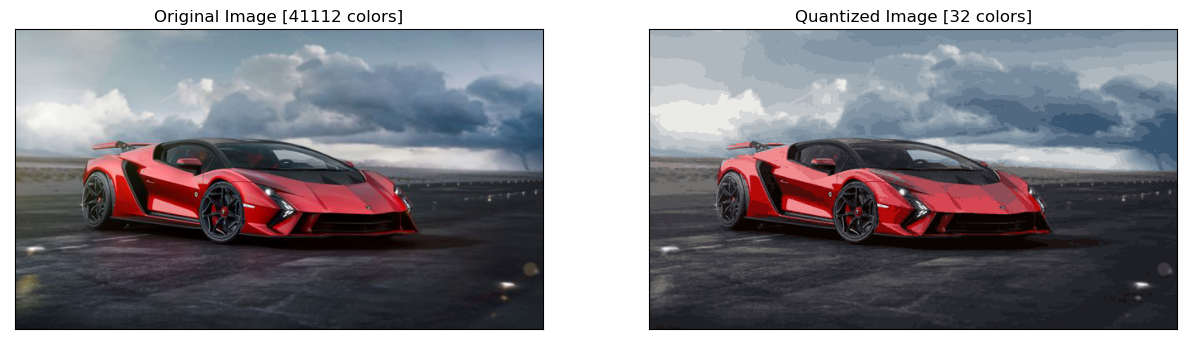

In [33]:
# 32 clusters
img = plt.imread("assets/car2.jpg")
quantize(img, 32)